# Importing libraries

In [2]:
import pandas as pd # used for dataframes
import numpy as np 
import xgboost as xgb # Gradient Boosting Algorithm
import matplotlib.pyplot as plt
import seaborn as sns
import gc # Garbage Collector required to extract unused and residual data and variables from memory
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Importing part of train_dataset (all models are based on the original dataset)

In [3]:
df = pd.read_csv('/Users/azin/code/azinmjalali/ChangeDEEPly/raw_data/df_full_withtime.csv')

In [4]:
df.head(2)

,Unnamed: 0,username,session_id,action,truth,id,start,end,category,gender,education,birth,timestamp,timediff
0,7084339,24057,df8ec8baa5af2f61e5426307be9a5e75,load_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436084,0.0
1,7084345,24057,df8ec8baa5af2f61e5426307be9a5e75,play_video,1,809,2015-05-11 20:00:00,2015-07-17 00:00:00,economics,male,Master's,1987.0,1433436087,3.0


# importing Pipeline

In [4]:
!pip install --upgrade scikit-learn

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from datetime import datetime
from sklearn import set_config
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
set_config(display='diagram')

In [6]:
df = df.drop(columns=['Unnamed: 0'])

In [7]:
def remove_duplicates(dataframe):
    return pd.DataFrame(dataframe).drop_duplicates()

age_constructor = FunctionTransformer(lambda data: pd.DatetimeIndex(pd.to_datetime(data['start'], format='%Y-%m-%d')).year - pd.DatetimeIndex(pd.to_datetime(data['birth'], format='%Y')).year)
array_reshape = FunctionTransformer(lambda data: np.reshape(data, (-1, 1)))
rp = FunctionTransformer(lambda data: remove_duplicates(data))

gender_pipe = Pipeline([
    ('ohe', OneHotEncoder(drop='if_binary', sparse = False, handle_unknown='ignore')) #
])

category_edu_pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown='ignore',sparse = False)) # 
])

age_pipe = Pipeline([
    ('age_calc', age_constructor),
    ('reshape', array_reshape),
    ('stdscaler', StandardScaler())
])

basic_encoding_pipe = ColumnTransformer([
    ('gender_pipe', gender_pipe, ["gender"]),
    ('category_edu_pipe', category_edu_pipe, ["category", "education"])
], remainder="drop")

preprocessing_pipe = FeatureUnion([
    ('basic_encoding_pipe', basic_encoding_pipe),
    ('age', age_pipe)
])

# final_pipe = Pipeline([
#     ('preprocessing_pipe', preprocessing_pipe),
#     ('remove_duplicates', rp)
# ])

# final_pipe

Pipeline(steps=[('preprocessing_pipe',
                 FeatureUnion(transformer_list=[('basic_encoding_pipe',
                                                 ColumnTransformer(transformers=[('gender_pipe',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(drop='if_binary',
                                                                                                                 handle_unknown='ignore',
                                                                                                                 sparse=False))]),
                                                                                  ['gender']),
                                                                                 ('category_edu_pipe',
                                                                                  Pipeline(steps=[('ohe',
                                                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                                                 sparse=False))]),
                                                                                  ['category',
                                                                                   'education'])])),
                                                ('age',
                                                 Pipeline(steps=[('age_calc',
                                                                  FunctionTransformer(func=<function <lambda> at 0x1501f1af0>)),
                                                                 ('reshape',
                                                                  FunctionTransformer(func=<function <lambda> at 0x1501f1c10>)),
                                                                 ('stdscaler',
                                                                  StandardScaler())]))])),
                ('remove_duplicates',
                 FunctionTransformer(func=<function <lambda> at 0x1501f1ca0>))])

In [9]:
# # Impute then Scale for numerical variables: 
# num_transformer = Pipeline([
#     ('scaler', StandardScaler())])

# # Encode categorical variables
# cat_transformer = OneHotEncoder(handle_unknown='ignore', sparse=False)

# # Paralellize "num_transformer" and "One hot encoder"
# preprocessor = ColumnTransformer([
#     ('num_tr', num_transformer, ['birth']),
#     ('cat_tr', cat_transformer, ['education', 'gender', 'category'])])
    
# preprocessor

ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                  transformer_weights=None,
                  transformers=[('num_tr',
                                 Pipeline(memory=None,
                                          steps=[('scaler',
                                                  StandardScaler(copy=True,
                                                                 with_mean=True,
                                                                 with_std=True))],
                                          verbose=False),
                                 ['birth']),
                                ('cat_tr',
                                 OneHotEncoder(categories='auto', drop=None,
                                               dtype=<class 'numpy.float64'>,
                                               handle_unknown='ignore',
                                               sparse=False),
                                 ['education', 'gend

## Fitting and transfroming on pipeline

In [32]:
X_transformed = preprocessing_pipe.fit_transform(df)


display(pd.DataFrame(X_transformed).head(3))

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.162372
1,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.162372
2,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.162372


In [33]:
X_transformed.shape

(8322174, 26)

# Splitting the dataset

In [38]:
labels = df[['username','id']]
labels.shape

(8322174, 2)

In [40]:
unique_labels = labels.drop_duplicates()
unique_labels.shape
unique_labels = unique_labels.index
unique_labels

Int64Index([      0,       3,       5,       7,       9,      15,      19,
                 26,      28,      32,
            ...
            8317424, 8317579, 8318358, 8318690, 8318973, 8319463, 8319630,
            8320118, 8320535, 8321828],
           dtype='int64', length=42631)

In [41]:
y = df['truth']
y = y.iloc[unique_labels]

In [44]:
X_transformed = X_transformed[unique_labels,:]
X_transformed.shape

(42631, 26)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed[:5000], y[:5000], test_size=0.33, random_state=42)

# Modeling

## XGboost

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgbc_model = XGBClassifier(use_label_encoder=False)
xgbc_model.fit(X_train, y_train)

[16:52:34] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [65]:
cross_val_score(xgbc_model, X_train, y_train, cv = 5 , scoring= 'accuracy').mean()

[16:52:42] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:52:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

0.7014925373134329

## KNeighborsClassifier

In [46]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [47]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

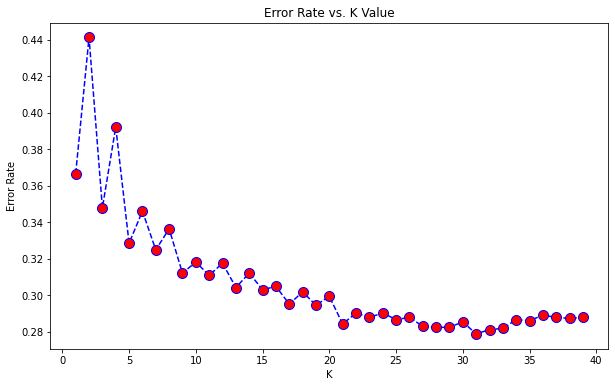

In [48]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [49]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=31)

In [50]:
knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train, cv = 5 , scoring= 'accuracy').mean()

0.6707462686567164

In [63]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()
logreg = LogisticRegression()

ensemble = VotingClassifier(
    estimators = [("rf", forest),("lr", logreg)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_train, y_train)
cross_val_score(ensemble, X_train, y_train, cv = 5 , scoring= 'accuracy').mean()

0.7014925373134329

In [73]:
ensemble = VotingClassifier(
    estimators = [("rf", forest),("knn", knn), ("xgbc_model", xgbc_model), ("gbc_model", gbc_model)],
    voting = 'soft', # to use predict_proba of each classifier before voting
    weights = [1,1, 1, 1] # to equally weight forest and logreg in the vote
)
ensemble.fit(X_train, y_train)
cross_val_score(ensemble, X_train, y_train, cv = 5 , scoring= 'accuracy').mean()

[16:58:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:36] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:37] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:58:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

0.7017910447761194

## GradientBoostingClassifier

In [55]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc_model = GradientBoostingClassifier()

gbc_model.fit(X_train, y_train)

GradientBoostingClassifier()

In [56]:
cross_val_score(gbc_model, X_train, y_train, cv = 5 , scoring= 'accuracy').mean()

0.7170149253731343